In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import time
import sklearn

In [26]:
data = pd.read_csv('D:/data_set.csv')

In [27]:
X=features = data[['Year','Latitude', 'Longitude']]
Y=target = data['Elevation']

In [28]:
data.shape

(7795, 15)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7795 entries, 0 to 7794
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        7795 non-null   int64  
 1   State       7795 non-null   object 
 2   Project ID  7795 non-null   object 
 3   Rest_Unit   3014 non-null   object 
 4   ContSite    4781 non-null   object 
 5   PatchID     7795 non-null   int64  
 6   RTK ID      7795 non-null   object 
 7   region_ID   7795 non-null   object 
 8   UTM_Zone    7795 non-null   int64  
 9   Northing    7795 non-null   float64
 10  Easting     7795 non-null   float64
 11  Longitude   7795 non-null   float64
 12  Latitude    7795 non-null   float64
 13  Elevation   7795 non-null   float64
 14  Comments    2986 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 913.6+ KB


In [30]:
data.isnull().sum()

Year             0
State            0
Project ID       0
Rest_Unit     4781
ContSite      3014
PatchID          0
RTK ID           0
region_ID        0
UTM_Zone         0
Northing         0
Easting          0
Longitude        0
Latitude         0
Elevation        0
Comments      4809
dtype: int64

In [31]:
X = np.array(features)
Y = np.array(target).reshape(-1, 1).astype(int)

In [32]:
X = preprocessing.MinMaxScaler().fit_transform(X)
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(Y)

C:\Users\enith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [34]:
X_train.shape

(5456, 3)

In [35]:
X_test.shape

(2339, 3)

In [36]:
y_train.shape

(5456, 1)

In [37]:
y_test.shape

(2339, 1)

In [38]:
model = GaussianNB()
model.fit(X_train, y_train)

C:\Users\enith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [39]:
y_pred = model.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

C:\Users\enith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\enith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\enith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [41]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.8401026079521163


In [42]:
print(f'Classification Report:\n{classification_rep}')

Classification Report:
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         0
          -1       0.00      0.00      0.00         0
           0       0.92      0.89      0.90      1928
           1       0.54      0.62      0.58       408
           2       0.00      0.00      0.00         3

    accuracy                           0.84      2339
   macro avg       0.29      0.30      0.30      2339
weighted avg       0.85      0.84      0.84      2339



In [43]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred,labels=[0,1])

<function matplotlib.pyplot.show(close=None, block=None)>

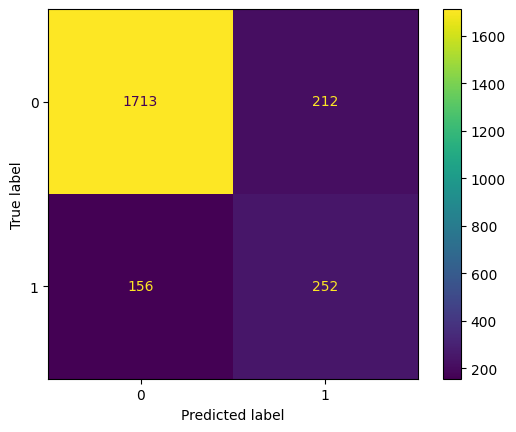

In [44]:
diplay = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
diplay.plot()
plt.show

In [45]:
sensitivity_recall = metrics.recall_score(y_test, y_pred,average = 'micro')
print(sensitivity_recall)

0.8401026079521163


In [46]:
specificity = metrics.recall_score(y_test, y_pred,pos_label=0,average = 'micro')
print(specificity)

0.8401026079521163


C:\Users\enith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1549: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
